In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem


# Path where csv file is located
data_path = "../csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,33.17822651
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [37]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [38]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [39]:
#CHecking shape
data_churn.shape

(7043, 22)

In [40]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 21'],
      dtype='object')

In [41]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
Unnamed: 21         7043
dtype: int64

In [43]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

C:\Users\eek_e\AppData\Local\Temp\ipykernel_16876\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


In [44]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

11

In [46]:
#droping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
Unnamed: 21         7032
dtype: int64

In [47]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [48]:
#describing the data
data_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


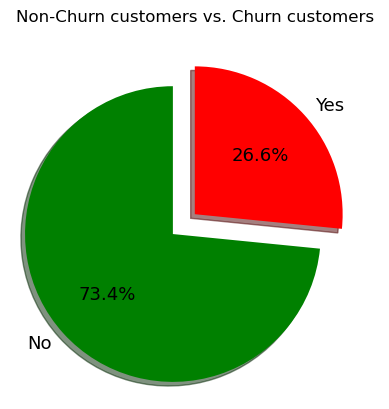

In [49]:
churn= data_churn['Churn'].value_counts()

# Make the pie chart
# Create a pie chart using Matplotlib Pyplot 
plt.pie(churn.values, labels=churn.index, autopct='%1.1f%%', colors=['g', 'r'], startangle=90, shadow=True, explode=(0.2, 0.0), 
        textprops={'fontsize': 13, 'color': 'black'})
plt.title("Non-Churn customers vs. Churn customers")

# Save an image of our chart and print the final product to the screen
# plt.savefig("Images/Churn_pie.png")
plt.show()

In [18]:
#1_Hypothesis
#What is the average monthly charge for churn vs non-churn customers
monthly_rate = data_churn.groupby('Churn')['MonthlyCharges'].mean()
monthly_rate

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [19]:
#Correlation between churn - Yes and monthly charges and the spread in a scatter plot 
# Calculate correlation coefficient #Check stpearson function as well for the correlation
correlation = monthly_rate.corr(churn)
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: -1.00


In [20]:
# Monthly charges - Mean, Median and Standard dev using the aggregation method
monthlycharge_st = data_churn.groupby('Churn')['MonthlyCharges'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
monthlycharge_st = pd.DataFrame(monthlycharge_st)
monthlycharge_st

,mean,median,var,std,sem
Churn,,,,,
No,61.307408,64.45,966.871469,31.094557,0.432746
Yes,74.441332,79.65,608.414183,24.666053,0.570552


In [21]:
#3_Hypothesis
#What is the average tenure for churn vs non-churn customers
tenure_period = data_churn.groupby('Churn')['tenure'].mean()
tenure_period

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

In [22]:
# Tenure - Mean, Median and Standard dev using the aggregation method
tenure_st = data_churn.groupby('Churn')['tenure'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
tenure_st = pd.DataFrame(tenure_st)
tenure_st

,mean,median,var,std,sem
Churn,,,,,
No,37.650010,38.0,579.699064,24.076940,0.335081
Yes,17.979133,10.0,381.464768,19.531123,0.451775


In [23]:
#Bin tenure Establish the bins
tenure_bins = [-1, 12, 24, 36, 48, 60, 72, 120]
labels = ["0-12m", "12-24m", "24-36m", "36-48m", "48-60m", "60-72m", ">72m" ]

tenure_df = data_churn
# Use `pd.cut` on the data churn dataframe to categorize tenure on the bins.
tenure_df["Tenure"] = pd.cut(data_churn["tenure"], tenure_bins, labels =labels)

# Convert Tenure to a string
tenure_df["Tenure"]  = tenure_df["Tenure"].astype(str)
tenure_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Tenure
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0-12m
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,33.17822651,24-36m
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546,0-12m
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846,36-48m
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784,0-12m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,23.47287736,12-24m
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,71.34593023,60-72m
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,11.70439189,0-12m
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,4.120967742,0-12m


In [24]:
#Group by Tenure bins
Tenure_bins_summary = pd.DataFrame(tenure_df.groupby('Tenure')['Churn'].value_counts().unstack())
Tenure_bins_summary

Churn,No,Yes
Tenure,,
0-12m,1138,1037
12-24m,730,294
24-36m,652,180
36-48m,617,145
48-60m,712,120
60-72m,1314,93


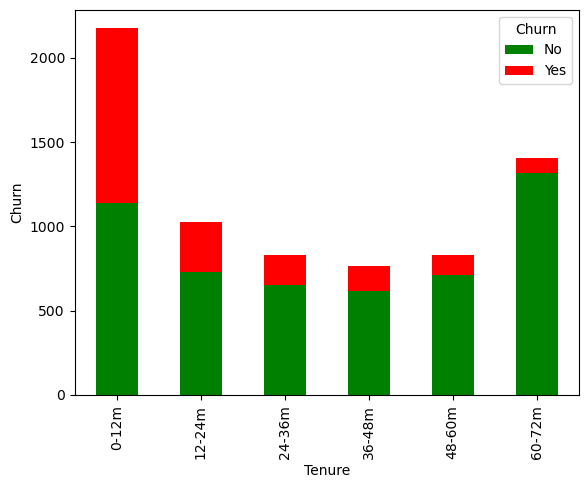

In [25]:
#Stack column chart to show 
# Set 'Category' as index for better plotting
# Create a bar plot using Pandas
Tenure_bins_summary.plot(kind='bar', stacked=True, figsize=(6.5, 5),color=['g', 'r'],rot=0)

# Customize the plot
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.xticks(rotation=90)  

# Display the plot
plt.show()

In [26]:
#Outliers and use a box plot 

In [27]:
#run correlation
#Correlation between churn - Yes and monthly charges and the spread in a scatter plot 
# Calculate correlation coefficient #Check stpearson function as well for the correlation
correlation = tenure_period.corr(churn)
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 1.00
